# Flight Fare Prediction Project Life Cycle
- Business Problem Understanding
- Data Collection
- Data Pre-processing
- Exploratory Data Analysis
- Model Selection
- Model Training
- Model Evaluation & Fine Tuning
- Model Deployment
- Model Monitoring & Maintainance

## Business Problem
Flight Fare is determined dynamically by airlines and it depends on various factors like:
- Flight Duration
- Demand
- No of stops
- Route
- No of days in advance the booking is made
- Time of Departure and Arrival

We need to create a model which can predict the flight fare given it's parameters

## Data Collection
Link: https://drive.google.com/file/d/1n9FqH3D1-nvviwvktEZeW4cgEPacGuRe/view?usp=sharing

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Loading the dataset
data = pd.read_csv("B:\Summer_Training_2024\Flight_Fare_Prediction\Flight_Data.csv", low_memory = False)

In [3]:
# Checking the data
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,03-01-2018
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,04-01-2018
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,05-01-2018


In [38]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
301201,1300218,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Economy,113.83,1,14985,15-03-2018
301202,1300219,Air_India,AI-512,Delhi,Afternoon,one,Night,Mumbai,Economy,97.58,1,14670,16-03-2018
301203,1300220,Air_India,AI-537,Delhi,Evening,one,Morning,Mumbai,Economy,115.83,1,15195,17-03-2018
301204,1300221,Vistara,UK-977,Delhi,Evening,zero,Night,Mumbai,Economy,622.25,1,15720,18-03-2018
301205,1300222,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Economy,124.42,1,15983,19-03-2018


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        301206 non-null  int64  
 1   airline           300754 non-null  object 
 2   flight            301206 non-null  object 
 3   source_city       301206 non-null  object 
 4   departure_time    301206 non-null  object 
 5   stops             301206 non-null  object 
 6   arrival_time      301206 non-null  object 
 7   destination_city  301206 non-null  object 
 8   class             301006 non-null  object 
 9   duration          300956 non-null  float64
 10  days_left         301206 non-null  int64  
 11  price             301106 non-null  object 
 12  date              358 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 29.9+ MB


In [40]:
# Creating a copy of the dataset
df = data.copy()

## Data Pre-processing

In [41]:
# Checking dataframe shape
df.shape

(301206, 13)

In [42]:
# All columns
columns = df.columns
columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'date'],
      dtype='object')

In [43]:
# Numeric columns
numeric_columns = df.select_dtypes(include = 'number').columns
numeric_columns

Index(['Unnamed: 0', 'duration', 'days_left'], dtype='object')

In [44]:
# Non-Numeric columns
numeric_columns = df.select_dtypes(include = 'object').columns
numeric_columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'price', 'date'],
      dtype='object')

### Duplicate Entries

In [45]:
# Checking for duplicate values
df_duplicate = df[df.duplicated()]
print('Count of duplicate entries: ', df_duplicate.shape[0])
df_duplicate

Count of duplicate entries:  0


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date


In [46]:
# Checking null values
null_values = df.isnull().sum()
null_values_percentage = (null_values/df.shape[0])*100

# Creating a dataframe with null value count & null value percentage
df_null = pd.DataFrame({'Null_Count': null_values, 'Null_Percentage': null_values_percentage})
df_null

,Null_Count,Null_Percentage
Unnamed: 0,0,0.000000
airline,452,0.150063
flight,0,0.000000
source_city,0,0.000000
departure_time,0,0.000000
stops,0,0.000000
arrival_time,0,0.000000
destination_city,0,0.000000
class,200,0.066400
duration,250,0.083000


In [47]:
# Checking non-numeric entries in 'price column'
df['price'].str.isnumeric().value_counts()

True     301104
False         2
Name: price, dtype: int64

#### Columns to be hadled:
1. **Unnamed: 0** 
    - It has no use, should be dropped
2. **date** 
     - column has more than 99% null values, should be dropped
3. **Airline, class** 
    - It has less than 0.1% null values, corresponding rows can be dropped
4. **price** 
    - Data type should be changed from object to numeric
    - null values can be dropped
5. **duration**
    - It is given as hr:mints, should be converted into minutes
    - Null values can be dropped


#### 'Unnamed: 0' & 'date'

In [48]:
# Dropping 'Unnamed: 0' & 'date'
df.drop(columns = ['Unnamed: 0','date'], axis = 1, inplace = True)
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


#### price

In [49]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300754 non-null  object 
 1   flight            301206 non-null  object 
 2   source_city       301206 non-null  object 
 3   departure_time    301206 non-null  object 
 4   stops             301206 non-null  object 
 5   arrival_time      301206 non-null  object 
 6   destination_city  301206 non-null  object 
 7   class             301006 non-null  object 
 8   duration          300956 non-null  float64
 9   days_left         301206 non-null  int64  
 10  price             301104 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 25.3+ MB


#### Dropping null values from: 'price', duration, class, airline

In [50]:
df.dropna(inplace = True)
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#### duration

In [51]:
# creating a function to convert duration in minutes
def dution_to_minute(t):
    i = t//1
    f = round(t%1, 2)*100
    time = i*60 + f
    return time

In [52]:
# Creating a new column with duration in minutes
df['duration_minutes'] = df['duration'].apply(dution_to_minute)
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_minutes
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,137.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,153.0


#### Dropping duration column

In [53]:
df.drop(columns = ['duration'], axis = 1, inplace = True)
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_minutes
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953.0,137.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953.0,153.0


In [54]:
df.shape

(300204, 11)

### Outliers

In [55]:
df.describe()

,days_left,price,duration_minutes
count,300204.000000,3.002040e+05,300204.000000
mean,26.000503,2.101474e+04,751.282058
std,13.563767,2.541873e+04,437.990613
min,1.000000,1.105000e+03,60.000000
25%,15.000000,4.783000e+03,427.750000
50%,26.000000,7.425000e+03,692.000000
75%,38.000000,4.252100e+04,985.000000
max,49.000000,2.512780e+06,37345.000000


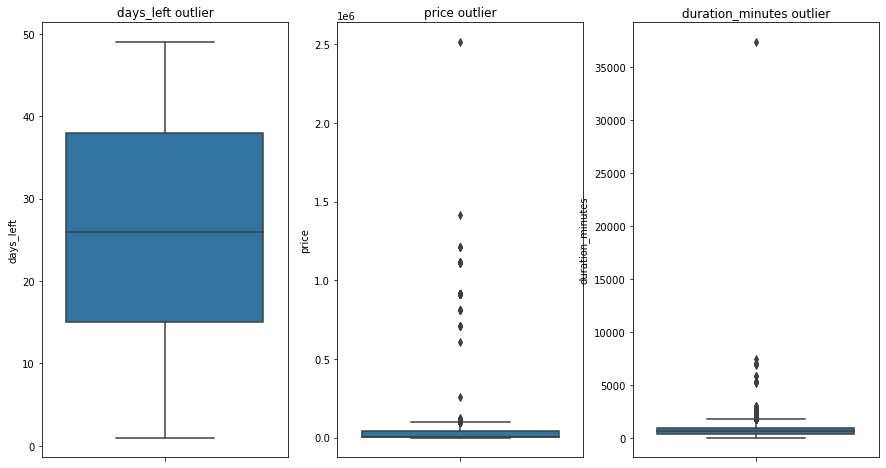

In [56]:
# visualizing outliers
fig, ax = plt.subplots(1,3, figsize = (15,8))

sns.boxplot(y = 'days_left', data = df, ax = ax[0])
ax[0].set_title('days_left outlier')

sns.boxplot(y = 'price', data = df, ax = ax[1])
ax[1].set_title('price outlier')

sns.boxplot(y = 'duration_minutes', data = df, ax = ax[2])
ax[2].set_title('duration_minutes outlier')

plt.show()

#### price column outlier removal

In [57]:
# quartile & limits
Q1_price = np.quantile(df['price'], 0.25)
Q3_price = np.quantile(df['price'], 0.75)
IQR_price = Q3_price - Q1_price

print('Q1 is: ', Q1_price)
print('Q3 is:' , Q3_price)
print('Inter Quartile Range is: ', IQR_price)

lower_limit_price = Q1_price - IQR_price*1.5
upper_limit_price = Q3_price + IQR_price*1.5

print('Lower limit is: ', lower_limit_price)
print('Upper limit is: ', upper_limit_price)

Q1 is:  4783.0
Q3 is: 42521.0
Inter Quartile Range is:  37738.0
Lower limit is:  -51824.0
Upper limit is:  99128.0


In [58]:
# Removing outliers
df = df[(df['price']>lower_limit_price) & (df['price']<upper_limit_price)]
df.shape

(300041, 11)

#### duration_minutes outliers removal

In [59]:
# quartile & limits
Q1_duration_minutes = np.quantile(df['duration_minutes'], 0.25)
Q3_duration_minutes = np.quantile(df['duration_minutes'], 0.75)
IQR_duration_minutes = Q3_duration_minutes - Q1_duration_minutes

print('Q1 is: ', Q1_duration_minutes)
print('Q3 is:' , Q3_duration_minutes)
print('Inter Quartile Range is: ', IQR_duration_minutes)

lower_limit_duration_minutes = Q1_duration_minutes - IQR_duration_minutes*1.5
upper_limit_duration_minutes = Q3_duration_minutes + IQR_duration_minutes*1.5

print('Lower limit is: ', lower_limit_duration_minutes)
print('Upper limit is: ', upper_limit_duration_minutes)

Q1 is:  427.0
Q3 is: 985.0
Inter Quartile Range is:  558.0
Lower limit is:  -410.0
Upper limit is:  1822.0


In [60]:
# Removing outliers
df = df[(df['duration_minutes']>lower_limit_duration_minutes) & 
        (df['duration_minutes']<upper_limit_duration_minutes)]
df.shape

(297808, 11)

In [61]:
df.describe()

,days_left,price,duration_minutes
count,297808.000000,297808.000000,297808.000000
mean,26.039737,20882.163276,741.590716
std,13.549020,22672.480332,419.345082
min,1.000000,1105.000000,60.000000
25%,15.000000,4757.000000,427.000000
50%,26.000000,7424.000000,685.000000
75%,38.000000,42521.000000,977.000000
max,49.000000,98972.000000,1817.000000


#### Creating routes feature

In [62]:
# Route: source - destination
df['routes'] = df['source_city'] + '-' + df['destination_city']
df['routes'].value_counts()

Delhi-Mumbai           15289
Mumbai-Delhi           14808
Delhi-Bangalore        13997
Bangalore-Delhi        13735
Bangalore-Mumbai       12888
Mumbai-Bangalore       12770
Mumbai-Kolkata         12572
Delhi-Kolkata          11879
Kolkata-Mumbai         11235
Delhi-Chennai          10669
Kolkata-Delhi          10475
Mumbai-Hyderabad       10412
Mumbai-Chennai         10096
Hyderabad-Mumbai       10017
Bangalore-Kolkata       9975
Kolkata-Bangalore       9733
Chennai-Delhi           9618
Delhi-Hyderabad         9311
Chennai-Mumbai          9215
Bangalore-Hyderabad     8689
Hyderabad-Delhi         8505
Hyderabad-Kolkata       7878
Hyderabad-Bangalore     7849
Kolkata-Hyderabad       7814
Chennai-Kolkata         6786
Kolkata-Chennai         6556
Hyderabad-Chennai       6387
Chennai-Bangalore       6314
Bangalore-Chennai       6261
Chennai-Hyderabad       6075
Name: routes, dtype: int64

#### Creating duration_slab feature

In [63]:
df['duration_slab'] = ['up to 2 hrs'  if val <= 120 
                       else '2 to 5 hrs' if 120 < val <= 300
                       else '5 to 12 hrs' if 300 < val <= 720
                       else '12 to 24 hrs' if 720 < val < 1440
                       else 'more than 24 hrs'
                       for val in df['duration_minutes']]
df['duration_slab'].value_counts()

5 to 12 hrs         116648
12 to 24 hrs        110767
2 to 5 hrs           35956
more than 24 hrs     28135
up to 2 hrs           6302
Name: duration_slab, dtype: int64

In [64]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_minutes,routes,duration_slab
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953.0,137.0,Delhi-Mumbai,2 to 5 hrs
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953.0,153.0,Delhi-Mumbai,2 to 5 hrs


### Saving the cleaned data

In [70]:
df.to_csv(r"B:\Summer_Training_2024\Flight_Fare_Prediction\flight_data_cleaned.csv", 
          index = False)